# Find the best model and hyperparameters using sklearn digits dataset

# Import the sklearn digits dataset


In [1]:
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


# Show one image

In [3]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

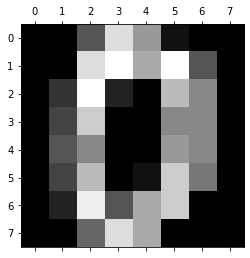

In [4]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

# Import all models that will be tested

In [5]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Build the model_params var to be used with GridSearchCV

In [6]:
# create the dictionary
model_params = {
    'svm' : { 
        'model' : svm.SVC(gamma='auto'),
        'params' : {
            'C' : [ 1, 5, 10, 20],
            'kernel' : [ 'rbf', 'linear' ]
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'criterion' : [ 'gini', 'entropy' ],
            'n_estimators' : [ 1, 5, 10 , 15]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(multi_class='auto'),
        'params' : {
            'penalty' : [ 'l1', 'l2' ],
            'C': [ 1, 2, 5, 10],
            'solver' : [ 'liblinear' ]
        }
    },
    'naive_bayes_gaussiannb' : { 
        'model' : GaussianNB(), 
        'params' : {}
    },
    'naive_bayes_multinomialNB' : {
        'model' : MultinomialNB(),
        'params' : {
            'alpha' : [ 1, 2, 5, 10 ], 
            'fit_prior' : [ 0, 1 ]
        }
    },
    'decision_tree_classifier' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : [ 'gini', 'entropy' ],
            'splitter' : [ 'best' , 'random' ]
        }
    }
}

# Explore the model_params structure

In [7]:
# print the models
for item in model_params:
    print(item)

svm
random_forest
logistic_regression
naive_bayes_gaussiannb
naive_bayes_multinomialNB
decision_tree_classifier


In [8]:
# print the models and their parameters
for model_name, params in model_params.items():
    print(model_name)
    print(params)

svm
{'model': SVC(gamma='auto'), 'params': {'C': [1, 5, 10, 20], 'kernel': ['rbf', 'linear']}}
random_forest
{'model': RandomForestClassifier(), 'params': {'criterion': ['gini', 'entropy'], 'n_estimators': [1, 5, 10, 15]}}
logistic_regression
{'model': LogisticRegression(), 'params': {'penalty': ['l1', 'l2'], 'C': [1, 2, 5, 10], 'solver': ['liblinear']}}
naive_bayes_gaussiannb
{'model': GaussianNB(), 'params': {}}
naive_bayes_multinomialNB
{'model': MultinomialNB(), 'params': {'alpha': [1, 2, 5, 10], 'fit_prior': [0, 1]}}
decision_tree_classifier
{'model': DecisionTreeClassifier(), 'params': {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}}


In [9]:
# print just the parameters grouped by the model
for model_name, mp in model_params.items():
    print(mp['params'])

{'C': [1, 5, 10, 20], 'kernel': ['rbf', 'linear']}
{'criterion': ['gini', 'entropy'], 'n_estimators': [1, 5, 10, 15]}
{'penalty': ['l1', 'l2'], 'C': [1, 2, 5, 10], 'solver': ['liblinear']}
{}
{'alpha': [1, 2, 5, 10], 'fit_prior': [0, 1]}
{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}


In [10]:
# print just the parameters
for model_name, mp in model_params.items():
    for param in mp['params'].items():
        print(param)

('C', [1, 5, 10, 20])
('kernel', ['rbf', 'linear'])
('criterion', ['gini', 'entropy'])
('n_estimators', [1, 5, 10, 15])
('penalty', ['l1', 'l2'])
('C', [1, 2, 5, 10])
('solver', ['liblinear'])
('alpha', [1, 2, 5, 10])
('fit_prior', [0, 1])
('criterion', ['gini', 'entropy'])
('splitter', ['best', 'random'])


# Implement the GridSearchCV to get the best model

In [11]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [12]:
# scores list
scores = []

In [13]:
# implement the GridSearchCV(estimator, param_grid, cv=5, return_train_score=False)
for model_name, model_items in model_params.items():
    # grid classifier
    grid_clf = GridSearchCV(model_items['model'], model_items['params'], cv=5, return_train_score=False)

    # digits.data and digits.target come from sklearn digits dataset
    grid_clf.fit(digits.data, digits.target)
    
    # append the score
    scores.append({
        'model' : model_name,
        'best score' : grid_clf.best_score_,
        'best param' : grid_clf.best_params_
    })

# create a pandas dataframe and add the colums to make it simple to read
df = pd.DataFrame(scores, columns = [ 'model', 'best score', 'best param' ])
df

,model,best score,best param
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.918225,"{'criterion': 'gini', 'n_estimators': 15}"
2,logistic_regression,0.927677,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}"
3,naive_bayes_gaussiannb,0.806928,{}
4,naive_bayes_multinomialNB,0.874246,"{'alpha': 10, 'fit_prior': 0}"
5,decision_tree_classifier,0.813025,"{'criterion': 'entropy', 'splitter': 'random'}"
